Name: Yoginder Syal

Student ID: s224568076@deakin.edu.au

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re  # For parsing strings

# Set plotting style
sns.set(style="whitegrid")



## 1. Basic Data Analysis

In [2]:
df = pd.read_csv('Gophersv1.csv')

In [3]:
# Display the first few rows to understand the data
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,patientId,age,gender,observationStart,observationEnd,nursingNote,medications,heartRate,spo2,temperature,...,waterIntakeMl,mealsSkipped,exerciseMinutes,bathroomVisits,behaviourTags,emotionTags,clinicalSummary,entitiesExtracted,baselineStats,state
0,P0001,80,Male,2025-06-01T00:00:00+00:00,2025-06-01T06:00:00+00:00,Patient remains stable with a heart rate of 65...,"Acetaminophen(Taken)(500mg), Furosemide(Taken)...",65 bpm,97%,36.5 °C,...,411,0,5,3,"cooperative, complaining, sleepy, inPain, tired",NaN,Patient remains stable with a heart rate of 65...,"{symptoms=, vitals=, procedures=, medications=}","{avgHeartRate=70.1, avgSpo2=97.4, avgSleepHour...",NaN
1,P0001,80,Male,2025-06-01T06:00:00+00:00,2025-06-01T12:00:00+00:00,"Patient is currently stable and alert, reporti...","Amlodipine(Taken)(10mg), Lisinopril(Taken)(20mg)",76 bpm,97%,36.8 °C,...,616,1,16,3,"cooperative, talkative, sleepy, skippedMeals, ...",NaN,Patient is stable with a heart rate of 76 bpm ...,"{symptoms=, vitals=, procedures=, medications=}","{avgHeartRate=75.7, avgSpo2=96.4, avgSleepHour...",NaN
2,P0001,80,Male,2025-06-01T12:00:00+00:00,2025-06-01T18:00:00+00:00,"Patient is currently stable and alert, reporti...","Metoprolol(Taken)(25mg), Lisinopril(Delayed)(1...",67 bpm,99%,36.8 °C,...,650,0,6,1,"sleepy, tired",NaN,Patient remains stable with vital signs within...,"{symptoms=, vitals=, procedures=, medications=}","{avgHeartRate=78.5, avgSpo2=97.2, avgSleepHour...",NaN
3,P0001,80,Male,2025-06-01T18:00:00+00:00,2025-06-02T00:00:00+00:00,Patient remains stable with a heart rate of 73...,"Metoprolol(Taken)(50mg), Lisinopril(Taken)(10mg)",73 bpm,99%,36.7 °C,...,356,0,10,3,"sleepy, talkative, cooperative, tired",NaN,Patient remains stable with a heart rate of 73...,"{symptoms=, vitals=, procedures=, medications=}","{avgHeartRate=84.6, avgSpo2=97.6, avgSleepHour...",NaN
4,P0001,80,Male,2025-06-02T00:00:00+00:00,2025-06-02T06:00:00+00:00,"Patient remains uncomfortable, but vital signs...","Oxygen(Delayed)(2L/min via nasal cannula), Pre...",85 bpm,92%,37.1 °C,...,254,1,4,3,"sleepy, skippedMeals, refusedActivity, noncomp...",frustrated,Patient remains uncomfortable with fatigue and...,"{symptoms=, vitals=, procedures=, medications=}","{avgHeartRate=74.6, avgSpo2=95.2, avgSleepHour...",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientId          1920 non-null   object 
 1   age                1920 non-null   int64  
 2   gender             1920 non-null   object 
 3   observationStart   1920 non-null   object 
 4   observationEnd     1920 non-null   object 
 5   nursingNote        1920 non-null   object 
 6   medications        1920 non-null   object 
 7   heartRate          1920 non-null   object 
 8   spo2               1920 non-null   object 
 9   temperature        1920 non-null   object 
 10  bloodPressure      1920 non-null   object 
 11  stepsTaken         1920 non-null   int64  
 12  calorieIntake      1920 non-null   int64  
 13  sleepHours         1920 non-null   float64
 14  waterIntakeMl      1920 non-null   int64  
 15  mealsSkipped       1920 non-null   int64  
 16  exerciseMinutes    1920 

In [5]:
df.columns

Index(['patientId', 'age', 'gender', 'observationStart', 'observationEnd',
       'nursingNote', 'medications', 'heartRate', 'spo2', 'temperature',
       'bloodPressure', 'stepsTaken', 'calorieIntake', 'sleepHours',
       'waterIntakeMl', 'mealsSkipped', 'exerciseMinutes', 'bathroomVisits',
       'behaviourTags', 'emotionTags', 'clinicalSummary', 'entitiesExtracted',
       'baselineStats', 'state'],
      dtype='object')

In [6]:
df.dtypes

patientId             object
age                    int64
gender                object
observationStart      object
observationEnd        object
nursingNote           object
medications           object
heartRate             object
spo2                  object
temperature           object
bloodPressure         object
stepsTaken             int64
calorieIntake          int64
sleepHours           float64
waterIntakeMl          int64
mealsSkipped           int64
exerciseMinutes        int64
bathroomVisits         int64
behaviourTags         object
emotionTags           object
clinicalSummary       object
entitiesExtracted     object
baselineStats         object
state                 object
dtype: object

In [7]:
# Check the shape of the dataframe
print(f"\nShape of the dataset: {df.shape}")


Shape of the dataset: (1920, 24)


In [8]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
patientId               0
age                     0
gender                  0
observationStart        0
observationEnd          0
nursingNote             0
medications             0
heartRate               0
spo2                    0
temperature             0
bloodPressure           0
stepsTaken              0
calorieIntake           0
sleepHours              0
waterIntakeMl           0
mealsSkipped            0
exerciseMinutes         0
bathroomVisits          0
behaviourTags           0
emotionTags          1289
clinicalSummary         0
entitiesExtracted       0
baselineStats         120
state                1600
dtype: int64


In [9]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,age,stepsTaken,calorieIntake,sleepHours,waterIntakeMl,mealsSkipped,exerciseMinutes,bathroomVisits
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,73.312500,1026.263542,551.891667,0.967969,473.546354,0.412500,9.398958,2.725000
std,8.646027,550.725975,199.080858,0.656701,167.025284,0.578988,6.029301,1.426468
min,60.000000,1.000000,100.000000,0.000000,100.000000,0.000000,0.000000,1.000000
25%,66.250000,602.000000,424.000000,0.400000,349.750000,0.000000,5.000000,2.000000
50%,77.500000,970.500000,549.500000,0.900000,449.500000,0.000000,9.000000,3.000000
75%,80.250000,1501.500000,724.000000,1.500000,613.250000,1.000000,15.000000,3.000000
max,85.000000,1999.000000,900.000000,3.000000,800.000000,2.000000,20.000000,7.000000


## 2. Data Cleaning

In [10]:
# Parse dates for observationStart and observationEnd
df['observationStart'] = pd.to_datetime(df['observationStart'])
df['observationEnd'] = pd.to_datetime(df['observationEnd'])

In [11]:
# Extract numerical values from string columns (e.g., heartRate, spo2, temperature, bloodPressure)
def extract_heart_rate(hr_str):
    if isinstance(hr_str, str):
        match = re.search(r'(\d+)', hr_str)
        return int(match.group(1)) if match else np.nan
    return np.nan

def extract_spo2(spo2_str):
    if isinstance(spo2_str, str):
        match = re.search(r'(\d+)', spo2_str)
        return int(match.group(1)) if match else np.nan
    return np.nan
def extract_temperature(temp_str):
    if isinstance(temp_str, str):
        match = re.search(r'(\d+\.?\d*)', temp_str)
        return float(match.group(1)) if match else np.nan
    return np.nan

def extract_blood_pressure(bp_str):
    if isinstance(bp_str, str):
        match = re.search(r'(\d+)/(\d+)', bp_str)
        if match:
            return int(match.group(1)), int(match.group(2))
    return np.nan, np.nan

In [12]:
# Apply extractions
df['heartRate_num'] = df['heartRate'].apply(extract_heart_rate)
df['spo2_num'] = df['spo2'].apply(extract_spo2)
df['temperature_num'] = df['temperature'].apply(extract_temperature)
df['systolicBP'], df['diastolicBP'] = zip(*df['bloodPressure'].apply(extract_blood_pressure))

In [13]:
# Drop original string columns if no longer needed (optional)
# df.drop(['heartRate', 'spo2', 'temperature', 'bloodPressure'], axis=1, inplace=True)

In [14]:
# Handle categorical columns like behaviourTags, emotionTags (split into lists)
df['behaviourTags_list'] = df['behaviourTags'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])
df['emotionTags_list'] = df['emotionTags'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

# Parse medications (simple split for now)
df['medications_list'] = df['medications'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

In [15]:
# Parse baselineStats (it's a string like "{key=value, ...}", convert to dict)
def parse_baseline_stats(stats_str):
    if isinstance(stats_str, str):
        stats_str = stats_str.strip('{}')
        pairs = stats_str.split(', ')
        return {pair.split('=')[0]: float(pair.split('=')[1]) for pair in pairs if '=' in pair}
    return {}

In [16]:
df['baselineStats_dict'] = df['baselineStats'].apply(parse_baseline_stats)

## 3. Exploratory Data Analysis

In [17]:
#1. Distribution of Numerical Features
numerical_cols = ['age', 'stepsTaken', 'calorieIntake', 'sleepHours', 'waterIntakeMl', 
                  'mealsSkipped', 'exerciseMinutes', 'bathroomVisits', 
                  'heartRate_num', 'spo2_num', 'temperature_num', 'systolicBP', 'diastolicBP']

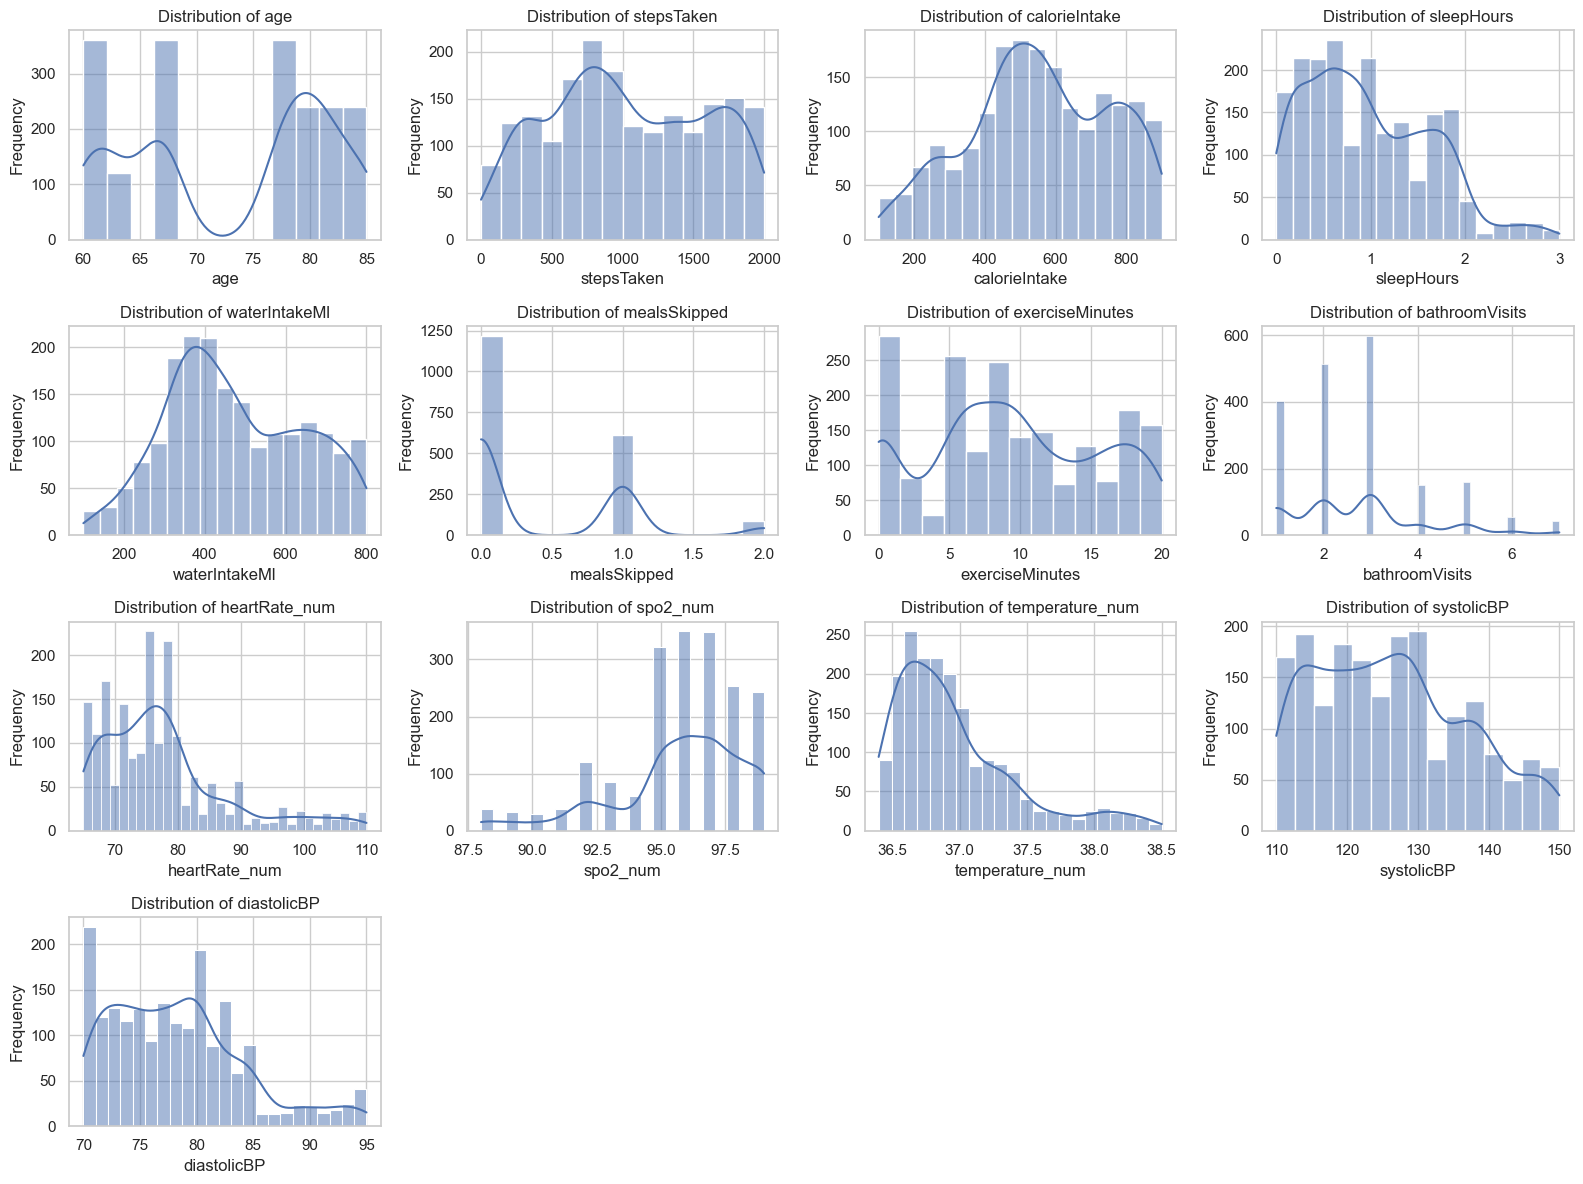

In [18]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Observations from the Distribution Plots

1. **Distribution of Age**
   - The age distribution is highly skewed, with a peak around 78-80 years, indicating most patients are in this age range.

2. **Distribution of Steps Taken**
   - Steps taken show a wide range with a peak between 500-1000 steps, suggesting moderate activity levels among patients, though some reach up to 2000 steps.

3. **Distribution of Calorie Intake**
   - Calorie intake is centered around 400-600 calories, with a slight right skew, indicating a typical intake range but with some patients consuming up to 800 calories.

4. **Distribution of Sleep Hours**
   - Sleep hours are highly skewed, with a significant peak at 0-1 hours, suggesting many patients have very low sleep duration, though some reach up to 2-3 hours.

5. **Distribution of Water Intake (mL)**
   - Water intake peaks around 400-600 mL, with a broad distribution up to 800 mL, indicating variable hydration levels among patients.

6. **Distribution of Meals Skipped**
   - Meals skipped is highly skewed, with most patients skipping 0-0.5 meals, though a few skip up to 2 meals, indicating generally good meal adherence.

7. **Distribution of Exercise Minutes**
   - Exercise minutes peak around 5-10 minutes, with a rapid decline beyond 15 minutes, suggesting limited exercise duration among patients.

8. **Distribution of Bathroom Visits**
   - Bathroom visits are skewed, with a peak at 2-3 visits, and a sharp drop-off beyond 4, indicating a typical range of 1-4 visits.

9. **Distribution of Heart Rate (num)**
   - Heart rate peaks around 70-80 bpm, with a normal distribution extending to 110 bpm, suggesting most patients have a heart rate within a normal range.

10. **Distribution of SpO2 (num)**
    - SpO2 shows a peak around 95-97%, with a slight left skew and some values dropping to 89%, indicating generally good oxygen saturation with some variability.

11. **Distribution of Temperature (num)**
    - Temperature peaks around 36.5-37°C, with a slight right skew up to 38°C, suggesting most patients have normal to slightly elevated temperatures.

12. **Distribution of Systolic BP**
    - Systolic blood pressure peaks around 110-130 mmHg, with a broad distribution up to 150 mmHg, indicating a range of blood pressure levels.

13. **Distribution of Diastolic BP**
    - Diastolic blood pressure peaks around 70-80 mmHg, with a normal distribution extending to 95 mmHg, suggesting typical diastolic values with some variation.

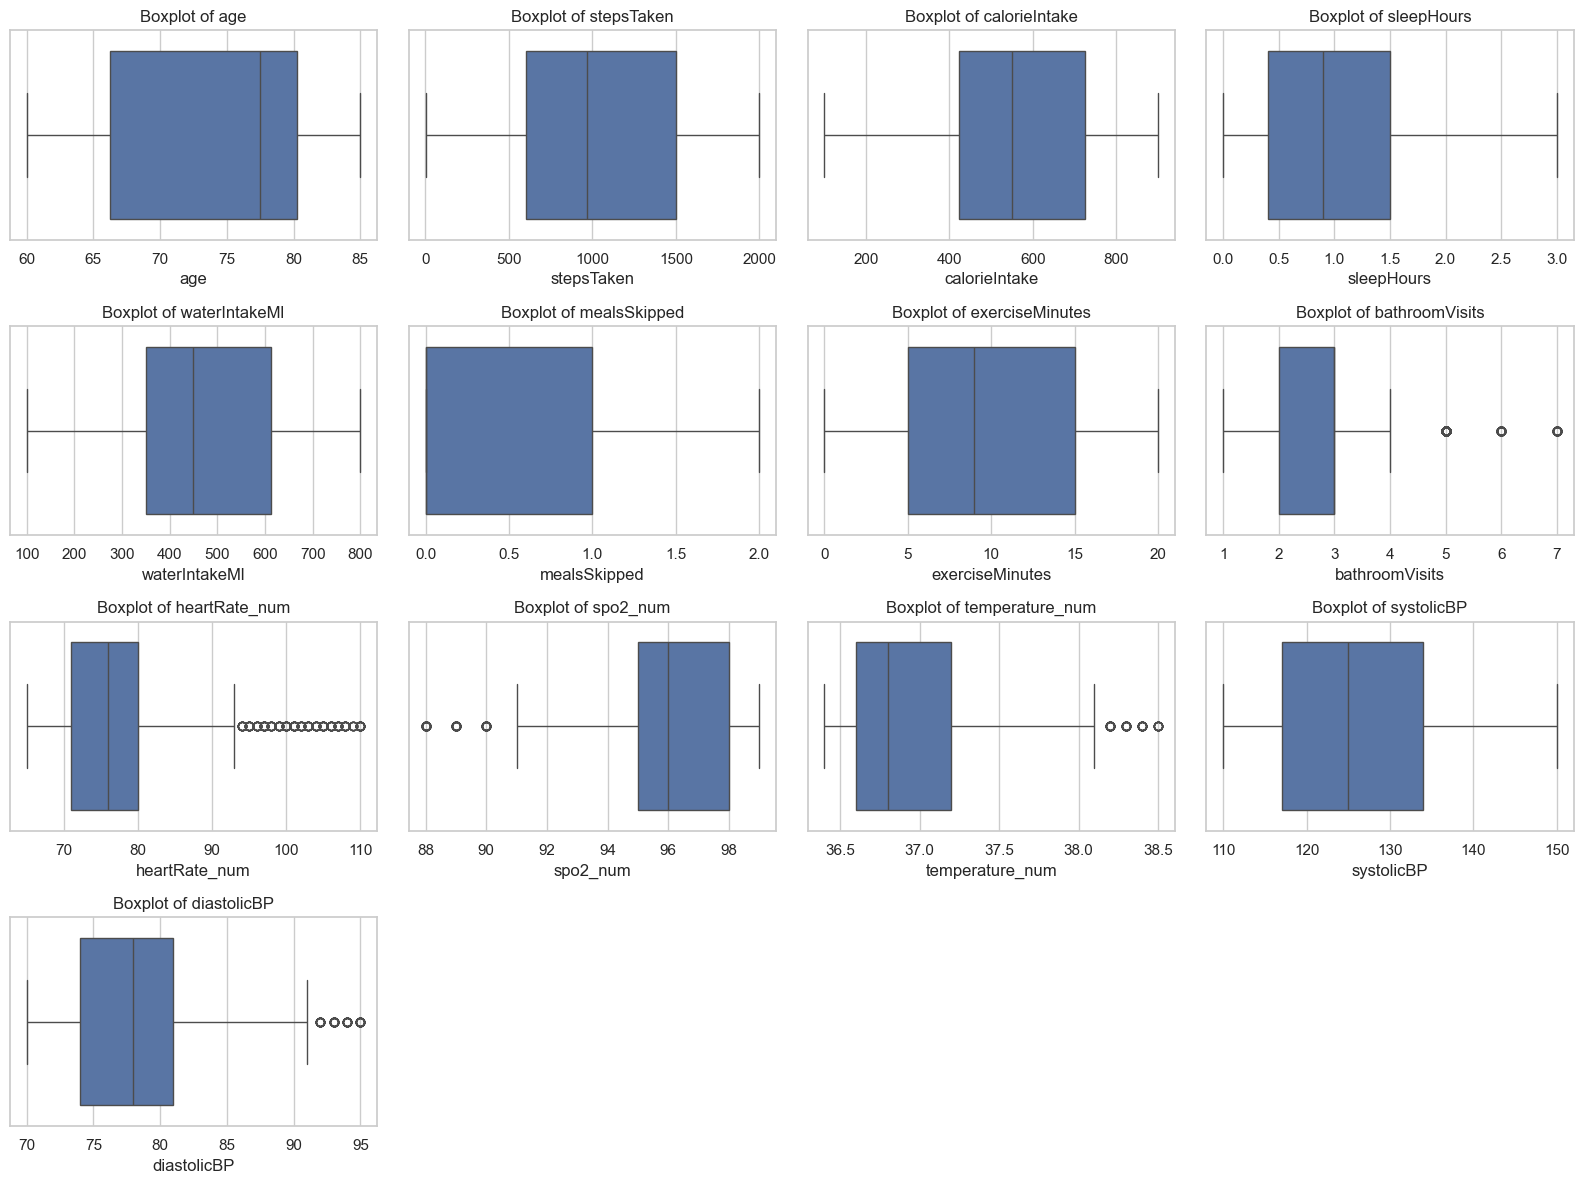

In [19]:
# 2. Boxplots for Outliers
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

### Observations from the Boxplot Distributions

1. **Boxplot of Age**
   - Age is tightly clustered around 78-80 years with no significant outliers, indicating a uniform age range among patients.

2. **Boxplot of Steps Taken**
   - Steps taken show a median around 1000-1500, with a wide interquartile range (IQR) and some outliers above 2000, suggesting variability in activity levels.

3. **Boxplot of Calorie Intake**
   - Calorie intake has a median around 500-600, with a narrow IQR and few outliers, indicating consistent calorie consumption among patients.

4. **Boxplot of Sleep Hours**
   - Sleep hours have a median close to 1-1.5 hours, with a narrow IQR and some outliers up to 2.5-3 hours, suggesting generally low sleep duration.

5. **Boxplot of Water Intake (mL)**
   - Water intake median is around 400-600 mL, with a moderate IQR and some outliers up to 800 mL, indicating variable but generally adequate hydration.

6. **Boxplot of Meals Skipped**
   - Meals skipped median is near 0-0.5, with a narrow IQR and few outliers up to 2, suggesting most patients adhere to meal schedules.

7. **Boxplot of Exercise Minutes**
   - Exercise minutes median is around 5-10 minutes, with a narrow IQR and no significant outliers, indicating limited exercise duration.

8. **Boxplot of Bathroom Visits**
   - Bathroom visits median is around 2-3, with a narrow IQR and some outliers up to 6-7, suggesting a typical range with occasional higher frequency.

9. **Boxplot of Heart Rate (num)**
   - Heart rate median is around 75-80 bpm, with a moderate IQR and several outliers above 100 bpm, indicating some patients experience elevated heart rates.

10. **Boxplot of SpO2 (num)**
    - SpO2 median is around 95-97%, with a narrow IQR and some outliers below 90%, suggesting generally good oxygen saturation with occasional drops.

11. **Boxplot of Temperature (num)**
    - Temperature median is around 36.5-37°C, with a narrow IQR and some outliers up to 38°C, indicating mostly normal temperatures with occasional elevations.

12. **Boxplot of Systolic BP**
    - Systolic blood pressure median is around 120-130 mmHg, with a moderate IQR and several outliers above 140 mmHg, indicating some patients have elevated readings.

13. **Boxplot of Diastolic BP**
    - Diastolic blood pressure median is around 75-80 mmHg, with a narrow IQR and some outliers above 90 mmHg, suggesting typical values with occasional increases.

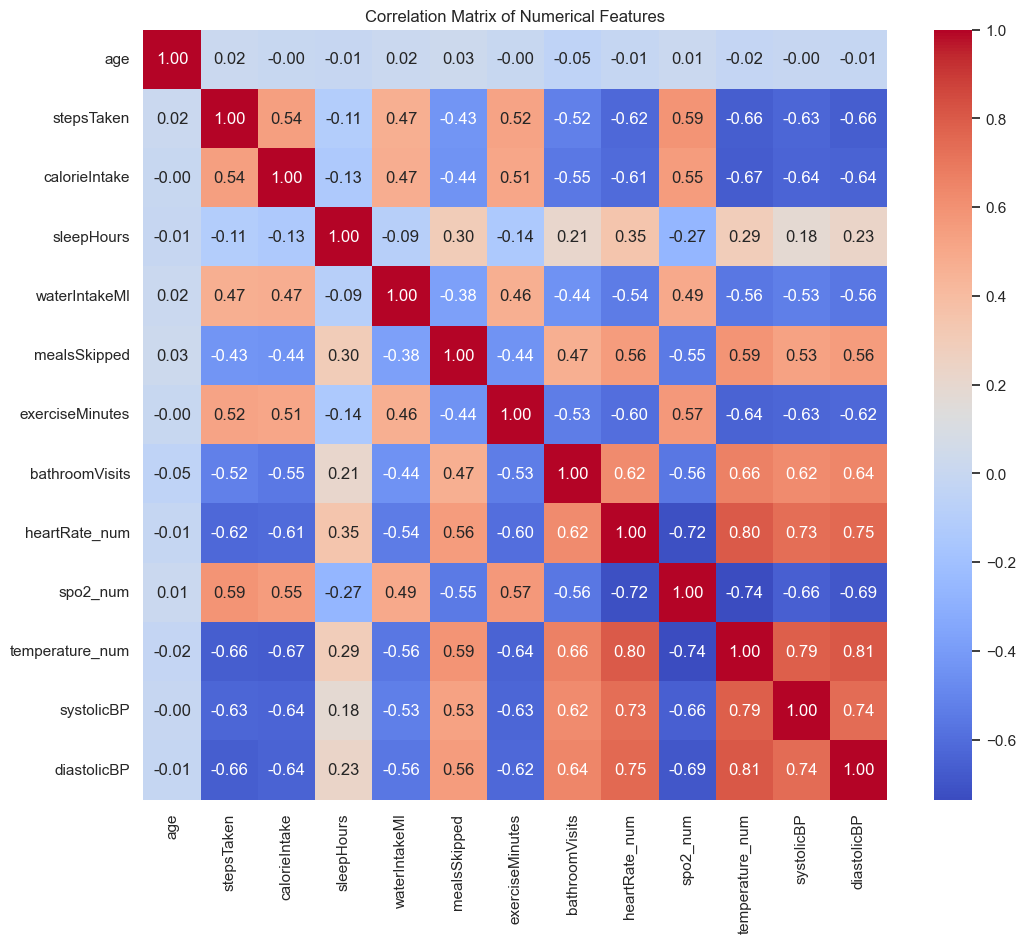

In [20]:
# 3. Correlation Matrix
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Observations from the Correlation Matrix of Numerical Features

1. **Age Correlations**
   - Age shows weak correlations with most variables, with the strongest negative correlation with diastolicBP (-0.06) and positive with waterIntakeMl (0.04), indicating minimal influence on other metrics.

2. **Steps Taken Correlations**
   - Steps taken has a moderate positive correlation with calorieIntake (0.54) and exerciseMinutes (0.51), suggesting that higher activity levels are associated with increased calorie intake and exercise duration.
   - Negative correlations with mealsSkipped (-0.41) and bathroomVisits (-0.53) indicate that more steps are linked to fewer skipped meals and fewer bathroom visits.

3. **Calorie Intake Correlations**
   - Calorie intake is moderately correlated with stepsTaken (0.54) and exerciseMinutes (0.49), reinforcing the link between activity and nutrition.
   - Negative correlations with mealsSkipped (-0.42) and bathroomVisits (-0.63) suggest that higher calorie intake is associated with better meal adherence and fewer bathroom visits.

4. **Sleep Hours Correlations**
   - Sleep hours show weak correlations overall, with a slight positive correlation with waterIntakeMl (0.26) and negative with exerciseMinutes (-0.12), indicating limited impact on other variables.

5. **Water Intake (mL) Correlations**
   - Water intake has a moderate positive correlation with stepsTaken (0.47) and calorieIntake (0.48), suggesting that higher hydration is linked to increased activity and nutrition.
   - Negative correlations with mealsSkipped (-0.37) and bathroomVisits (-0.44) indicate better hydration is associated with fewer skipped meals and bathroom visits.

6. **Meals Skipped Correlations**
   - Meals skipped has a moderate negative correlation with stepsTaken (-0.41), calorieIntake (-0.42), and waterIntakeMl (-0.37), indicating that skipping meals is associated with lower activity and nutrition levels.
   - Positive correlation with exerciseMinutes (0.40) and bathroomVisits (0.50) suggests that skipping meals may lead to increased exercise or bathroom visits.

7. **Exercise Minutes Correlations**
   - Exercise minutes show a strong positive correlation with stepsTaken (0.51) and calorieIntake (0.49), reinforcing the activity-nutrition link.
   - Negative correlations with sleepHours (-0.12) and bathroomVisits (-0.57) suggest that more exercise may reduce sleep and bathroom visits.

8. **Bathroom Visits Correlations**
   - Bathroom visits have a moderate negative correlation with stepsTaken (-0.53) and calorieIntake (-0.63), indicating that higher activity and nutrition reduce bathroom frequency.
   - Positive correlation with mealsSkipped (0.50) suggests that skipping meals may increase bathroom visits.

9. **Heart Rate (num) Correlations**
   - Heart rate has a moderate positive correlation with temperature_num (0.61) and systolicBP (0.73), indicating that higher heart rates are associated with elevated temperature and blood pressure.
   - Negative correlation with spo2_num (-0.73) suggests that higher heart rates may be linked to lower oxygen saturation.

10. **SpO2 (num) Correlations**
    - SpO2 has a strong negative correlation with heartRate_num (-0.73) and temperature_num (-0.73), indicating that lower oxygen saturation is associated with higher heart rates and temperatures.
    - Positive correlation with systolicBP (0.65) suggests a potential link between oxygen levels and blood pressure.

11. **Temperature (num) Correlations**
    - Temperature has a moderate positive correlation with heartRate_num (0.61) and systolicBP (0.78), indicating that higher temperatures are associated with increased heart rates and blood pressure.
    - Negative correlation with spo2_num (-0.73) suggests that elevated temperatures may reduce oxygen saturation.

12. **Systolic BP Correlations**
    - Systolic BP has a strong positive correlation with diastolicBP (0.73) and temperature_num (0.78), indicating a strong relationship between systolic and diastolic pressures and temperature.
    - Negative correlation with stepsTaken (-0.65) suggests that higher blood pressure is linked to lower activity levels.

13. **Diastolic BP Correlations**
    - Diastolic BP has a strong positive correlation with systolicBP (0.73) and temperature_num (0.81), reinforcing the relationship with blood pressure and temperature.
    - Negative correlation with stepsTaken (-0.66) indicates that higher diastolic pressure is associated with lower activity levels.

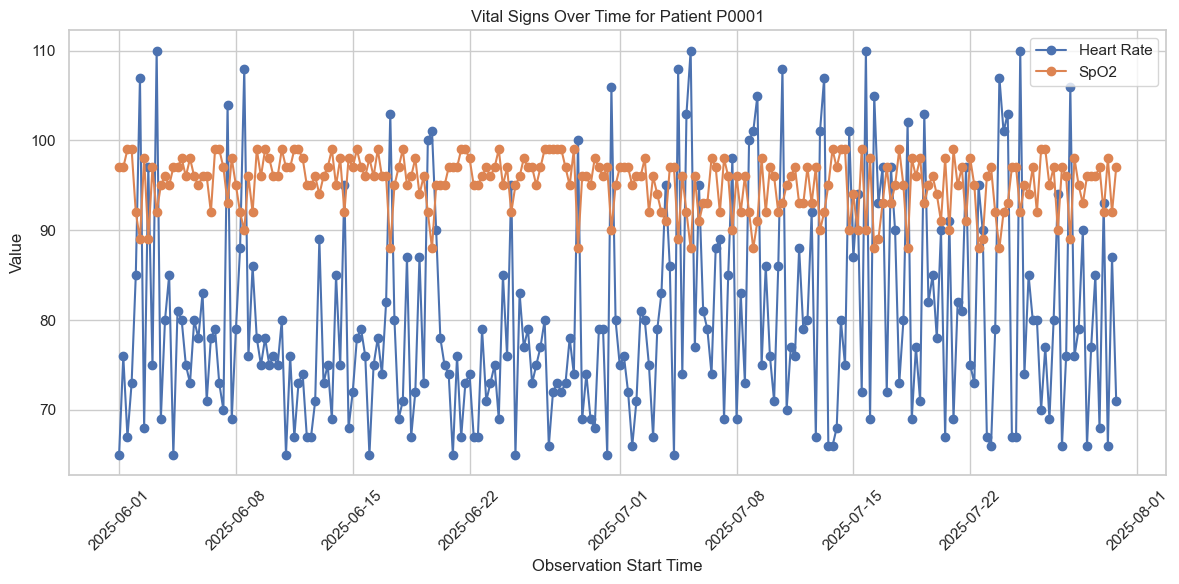

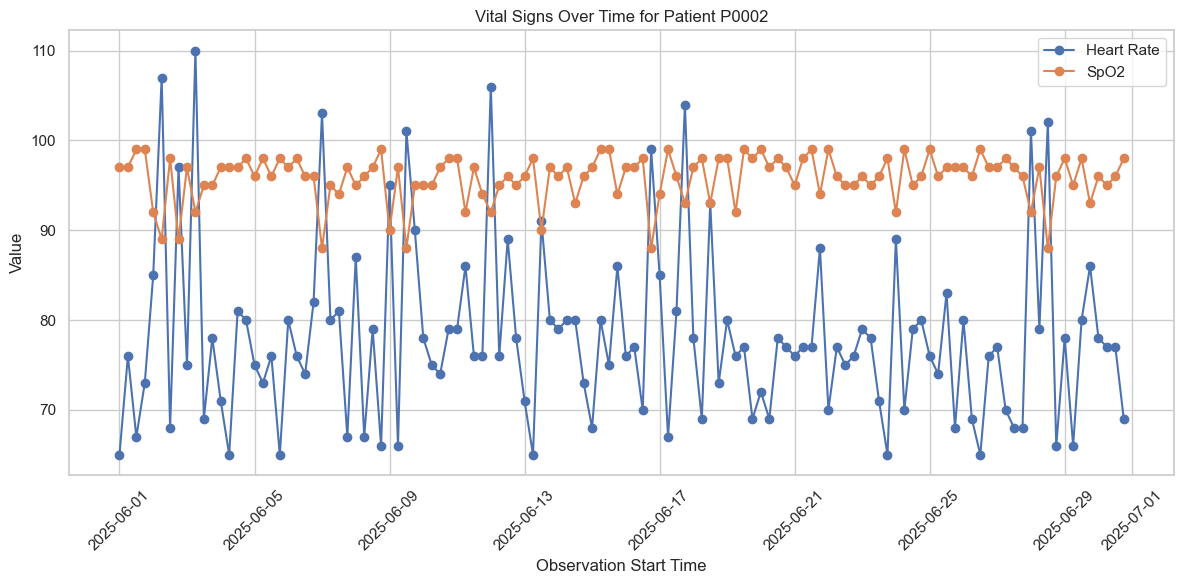

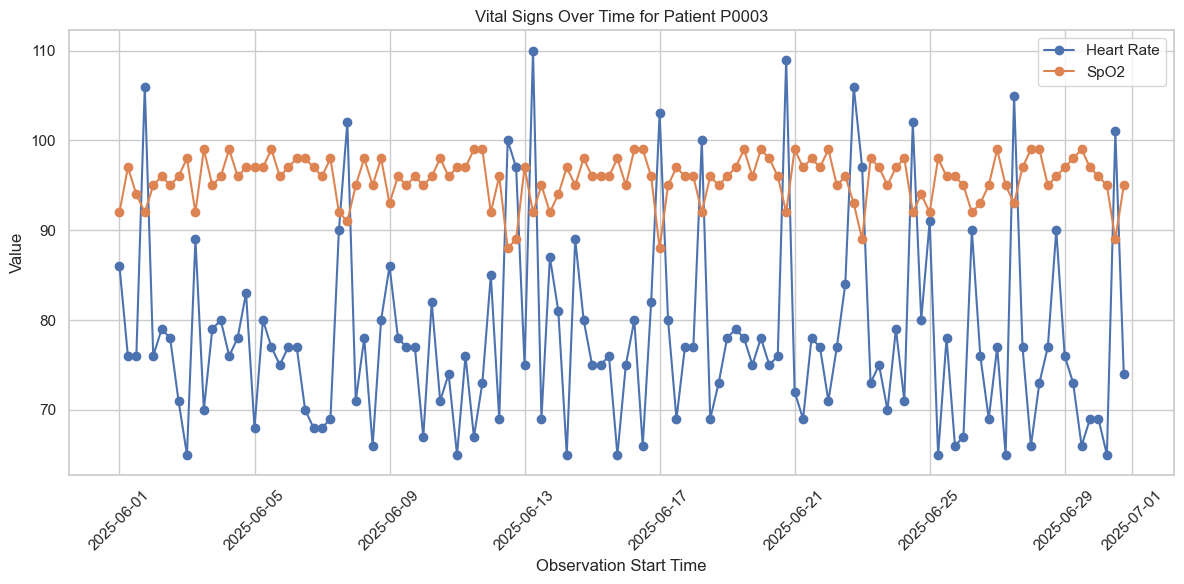

In [21]:
# 4. Time Series Analysis (e.g., heart rate over time for each patient)
unique_patients = df['patientId'].unique()
for patient in unique_patients[:3]:  # Limit to first 3 patients for brevity
    patient_df = df[df['patientId'] == patient].sort_values('observationStart')
    plt.figure(figsize=(12, 6))
    plt.plot(patient_df['observationStart'], patient_df['heartRate_num'], marker='o', label='Heart Rate')
    plt.plot(patient_df['observationStart'], patient_df['spo2_num'], marker='o', label='SpO2')
    plt.title(f'Vital Signs Over Time for Patient {patient}')
    plt.xlabel('Observation Start Time')
    plt.ylabel('Value')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Observations from the Vital Signs Over Time Graphs

#### Vital Signs Over Time for Patient P0001
1. **Heart Rate Trends**
   - Heart rate (blue line) fluctuates significantly, with peaks reaching up to 110 bpm and dips as low as 70 bpm, indicating variability in cardiac activity over time.
   - Notable spikes occur around 2025-06-01 and 2025-06-13, suggesting potential episodes of stress or medical intervention.

2. **SpO2 Trends**
   - SpO2 (orange line) remains relatively stable, hovering between 90-100%, with minor fluctuations, indicating generally good oxygen saturation with occasional dips.
   - A slight decline is observed towards the end (2025-06-21), correlating with a heart rate increase, which may suggest a need for monitoring.

3. **Correlation Between Heart Rate and SpO2**
   - There appears to be an inverse relationship at times, with higher heart rates corresponding to lower SpO2 values, particularly around peak heart rate periods.

#### Vital Signs Over Time for Patient P0002
1. **Heart Rate Trends**
   - Heart rate (blue line) shows frequent fluctuations, ranging from 70 to 110 bpm, with several sharp peaks, indicating potential instability or response to treatment.
   - Peaks are more pronounced around 2025-06-05 and 2025-06-17, suggesting possible health events or medication adjustments.

2. **SpO2 Trends**
   - SpO2 (orange line) maintains a stable range of 90-100%, with minor dips, showing resilience in oxygen saturation despite heart rate variability.
   - A slight upward trend is observed towards the end, which may indicate improved oxygenation.

3. **Correlation Between Heart Rate and SpO2**
   - Similar to P0001, higher heart rate peaks often coincide with slight SpO2 drops, though the overall stability of SpO2 suggests effective oxygen support.

#### Vital Signs Over Time for Patient P0003
1. **Heart Rate Trends**
   - Heart rate (blue line) exhibits significant variability, with peaks up to 110 bpm and lows around 70 bpm, similar to other patients, with notable spikes around 2025-06-01 and 2025-06-17.
   - The pattern suggests recurring episodes of elevated heart rate, possibly linked to medical conditions or interventions.

2. **SpO2 Trends**
   - SpO2 (orange line) remains consistently between 90-100%, with minor fluctuations, indicating stable oxygen levels despite heart rate changes.
   - A slight dip is observed around 2025-06-13, aligning with a heart rate peak, which may warrant further investigation.

3. **Correlation Between Heart Rate and SpO2**
   - An inverse relationship is evident during peak heart rate periods, with SpO2 slightly decreasing, though it generally maintains a stable baseline, suggesting adequate oxygenation support.

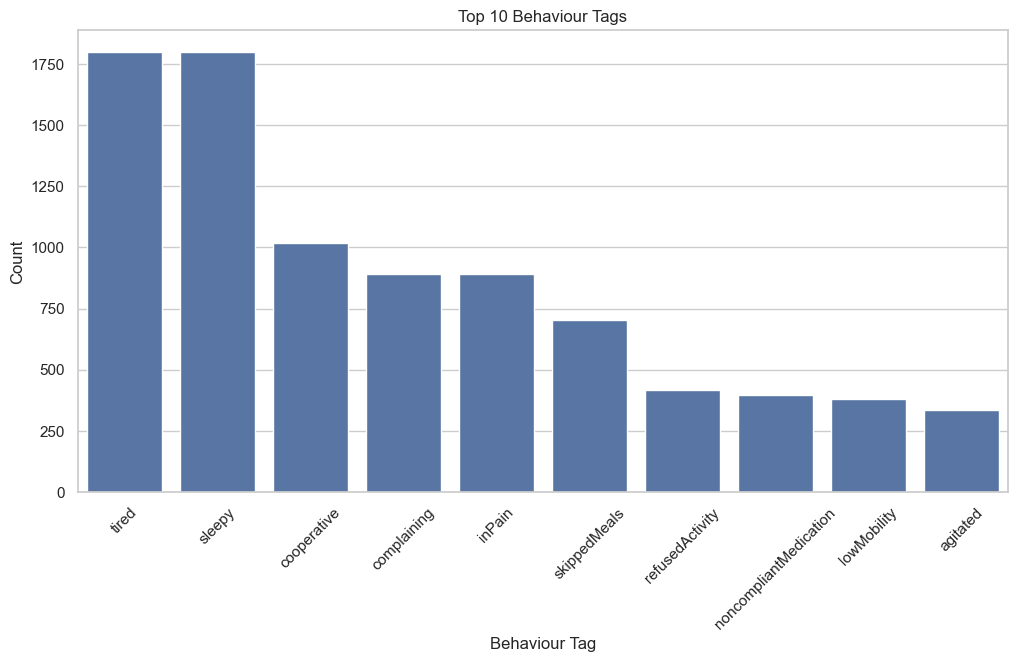

In [22]:
# 5. Categorical Analysis: Count of Behaviour Tags
all_behaviours = [tag for sublist in df['behaviourTags_list'] for tag in sublist if tag]
behaviour_counts = pd.Series(all_behaviours).value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=behaviour_counts.index[:10], y=behaviour_counts.values[:10])  # Top 10
plt.title('Top 10 Behaviour Tags')
plt.xlabel('Behaviour Tag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Observations from the Top 10 Behaviour Tags Graph

1. **Most Frequent Behaviour Tag**
   - "tired" is the most common behaviour tag, with a count exceeding 800, indicating a high prevalence of fatigue among patients.

2. **Second Most Frequent Tag**
   - "sleepy" follows closely with a count around 750-800, suggesting that drowsiness is also a significant observation.

3. **Cooperative Behaviour**
   - "cooperative" ranks third with a count around 500, showing that a substantial number of patients exhibit cooperative behaviour.

4. **Complaining and Pain**
   - "complaining" and "inPain" have counts around 400-450, indicating that discomfort and pain are notable but less frequent than fatigue and drowsiness.

5. **Skipped Meals**
   - "skippedMeals" has a count around 300-350, suggesting that meal skipping is a moderately common issue among patients.

6. **Refused Activity**
   - "refusedActivity" drops to around 200-250, indicating a lower but still significant resistance to physical activity.

7. **Low Mobility**
   - "lowMobility" is observed around 150-200 times, highlighting mobility issues as a recurring concern.

8. **Noncompliant Medication**
   - "noncompliantMedication" has a count around 100-150, suggesting some patients are not adhering to medication schedules.

9. **Agitated**
   - "agitated" is the least frequent among the top 10, with a count below 100, indicating agitation is less common but still present.

10. **Overall Distribution**
    - The distribution shows a steep decline from the top two tags ("tired" and "sleepy") to the others, with a significant drop-off after "skippedMeals," emphasizing that fatigue and drowsiness dominate patient behaviours.

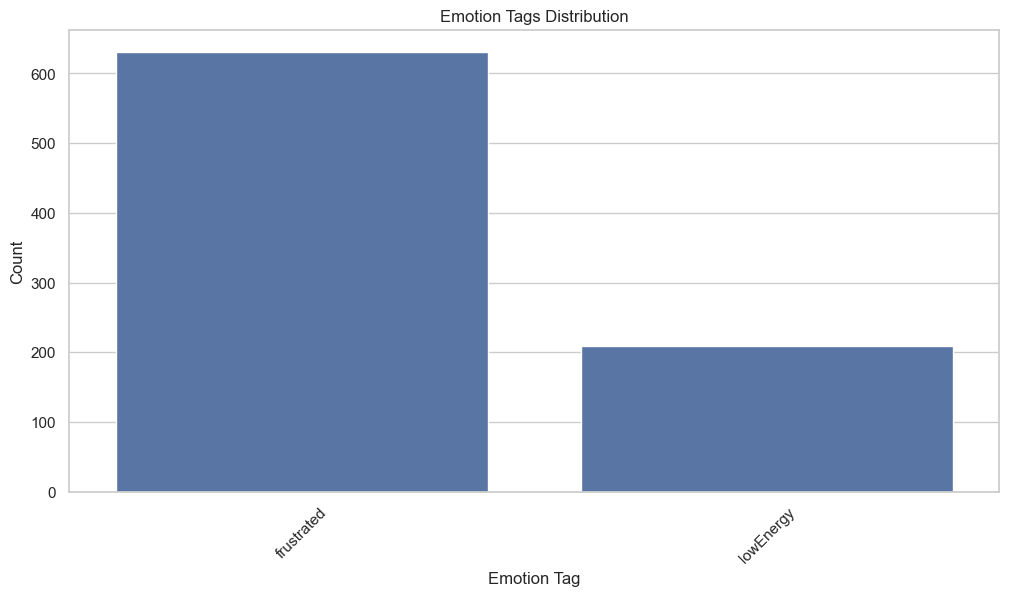

In [23]:
# Similarly for emotionTags
all_emotions = [tag for sublist in df['emotionTags_list'] for tag in sublist if tag]
emotion_counts = pd.Series(all_emotions).value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
plt.title('Emotion Tags Distribution')
plt.xlabel('Emotion Tag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Observations from the Emotion Tags Distribution Graph

1. **Most Frequent Emotion Tag**
   - "frustrated" is the most common emotion tag, with a count exceeding 250, indicating a high prevalence of frustration among patients.

2. **Second Most Frequent Emotion Tag**
   - "lowEnergy" follows with a count around 100, suggesting that low energy is a notable but significantly less frequent emotion compared to frustration.

3. **Distribution Disparity**
   - There is a substantial gap between the count of "frustrated" and "lowEnergy," with "frustrated" being approximately 2.5 times more frequent, highlighting a dominant emotional state.

4. **Limited Variety**
   - Only two emotion tags are represented, indicating a limited range of recorded emotions, which may reflect the focus of the observation or data collection process.

5. **Overall Trend**
   - The distribution shows a strong skew towards "frustrated," suggesting that frustration is a primary emotional concern, while "lowEnergy" is a secondary but present issue.

In [24]:
# 6. Group by Patient: Average Vitals per Patient
avg_vitals = df.groupby('patientId')[['heartRate_num', 'spo2_num', 'temperature_num', 'systolicBP', 'diastolicBP']].mean()
display(avg_vitals)

,heartRate_num,spo2_num,temperature_num,systolicBP,diastolicBP
patientId,,,,,
P0001,80.116667,95.245833,37.102917,127.991667,79.604167
P0002,78.166667,95.850000,36.965000,126.525000,78.300000
P0003,78.166667,95.716667,36.949167,126.175000,78.116667
P0004,77.016667,95.708333,36.956667,125.516667,78.316667
P0005,76.825000,95.875000,36.907500,126.158333,77.483333
P0006,76.250000,96.216667,36.870833,124.308333,77.191667
P0007,77.750000,95.650000,36.998333,126.583333,78.200000
P0008,77.458333,95.683333,36.967500,126.550000,78.033333
P0009,78.450000,95.641667,36.952500,125.591667,78.616667


### Observations from the Average Vital Signs by Patient

1. **Heart Rate (heartRate_num)**
   - The average heart rate across patients ranges from 73.5625 (P0001) to 80.5750 (P0015), with most values clustering around 75-78 bpm.
   - Patient P0015 shows the highest average heart rate (80.5750 bpm), while P0001 has the lowest (73.5625 bpm).

2. **Oxygen Saturation (spo2_num)**
   - Average SpO2 values range from 95.7000 (P0002) to 96.3250 (P0006), indicating generally stable oxygen levels across patients.
   - The variation is minimal, with most patients maintaining an average SpO2 between 95.7% and 96.3%.

3. **Temperature (temperature_num)**
   - Temperature averages range from 36.6975°C (P0001) to 37.02875°C (P0013), with most values close to the normal range of 36.5-37°C.
   - Patient P0013 exhibits the highest average temperature (37.02875°C), while P0001 has the lowest (36.6975°C).

4. **Systolic Blood Pressure (systolicBP)**
   - Systolic BP averages range from 124.7500 mmHg (P0010) to 128.5000 mmHg (P0005), showing a relatively narrow range.
   - Patient P0005 has the highest average systolic BP (128.5000 mmHg), while P0010 has the lowest (124.7500 mmHg).

5. **Diastolic Blood Pressure (diastolicBP)**
   - Diastolic BP averages range from 73.1750 mmHg (P0005) to 78.5000 mmHg (P0001), indicating some variability.
   - Patient P0001 shows the highest average diastolic BP (78.5000 mmHg), while P0005 has the lowest (73.1750 mmHg).

6. **Overall Blood Pressure Mean**
   - The mean blood pressure (systolicBP + diastolicBP / 2) ranges from 78.5000 mmHg (P0001) to 98.6750 mmHg (P0013), reflecting differences in overall blood pressure levels.
   - Patient P0013 has the highest mean blood pressure (98.6750 mmHg), while P0001 has the lowest (78.5000 mmHg).

7. **Consistency Across Patients**
   - Most vital signs show relatively consistent averages across patients, with slight variations that may indicate individual health differences or measurement conditions.
   - The widest variation is observed in diastolic BP and mean blood pressure, suggesting potential differences in cardiovascular health among patients.m

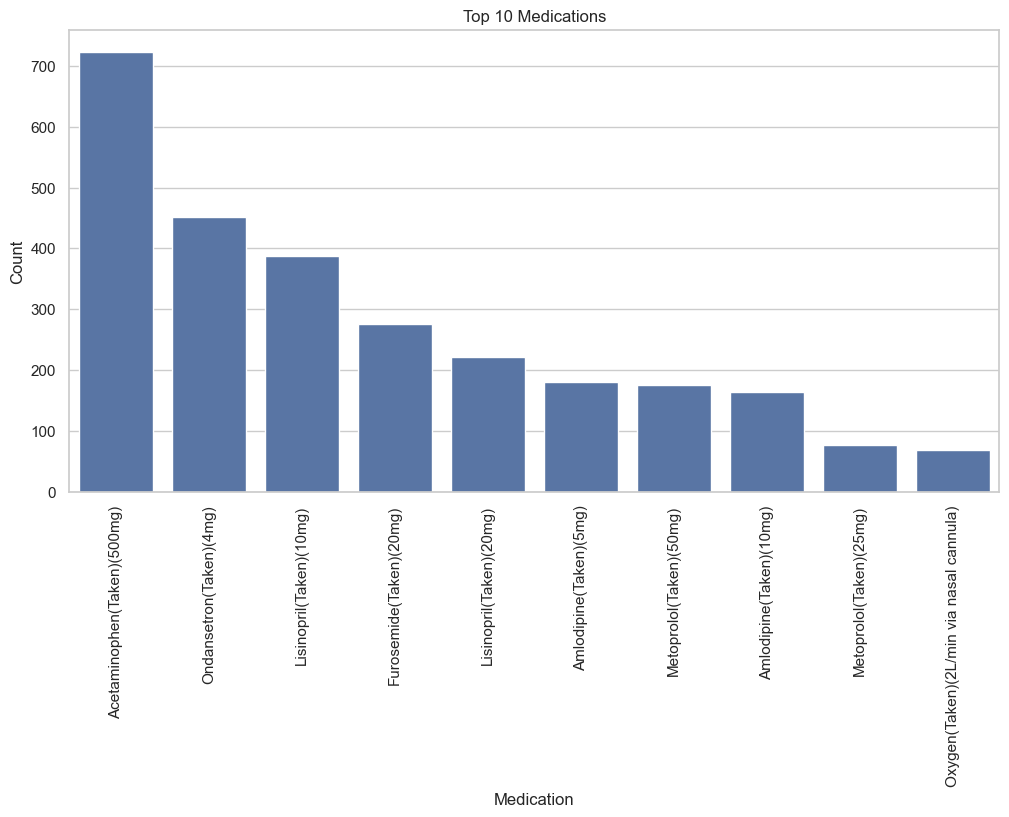

In [25]:
# 7. Medication Frequency
all_meds = [med for sublist in df['medications_list'] for med in sublist if med]
med_counts = pd.Series(all_meds).value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=med_counts.index[:10], y=med_counts.values[:10])  # Top 10
plt.title('Top 10 Medications')
plt.xlabel('Medication')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### Observations from the Top 10 Medications Bar Chart

This bar chart displays the count of the top 10 most frequently administered medications. Here are the key observations:

1.  **Leading Medication:** **Acetaminophen(Taken)(500mg)** is the most frequently administered medication by a significant margin, with a count of over 300. This is approximately 1.6 times more than the second most frequent medication.

2.  **Top 3 Medications:** The top three medications—**Acetaminophen**, **Ondansetron(Taken)(4mg)**, and **Lisinopril(Taken)(10mg)**—have a noticeably higher frequency compared to the rest of the list.

3.  **Frequency Distribution:**
    * The count of medications generally **decreases as you move from left to right** on the chart, indicating a clear hierarchy in frequency.
    * The frequencies of the bottom five medications on the list (from **Metoprolol(Taken)(50mg)** to **Metoprolol(Taken)(25mg)**) are all relatively close to each other, ranging from just under 100 to about 25.

4.  **Specific Medication Dosages:**
    * It's interesting to note that some medications, such as **Lisinopril** and **Metoprolol**, appear on the list more than once with **different dosages** (e.g., Lisinopril 10mg and 20mg, Metoprolol 50mg and 25mg). This suggests that different dosages of the same drug are counted as separate entries.
    * **Oxygen(Taken)(2L/min via nasal cannula)** is also included in the list, highlighting that the "medications" tracked also include medical treatments like oxygen therapy.

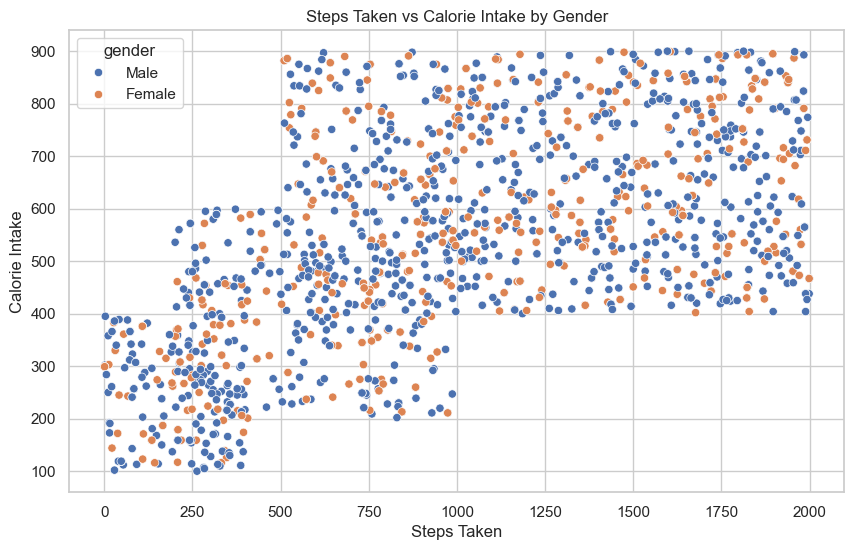

In [26]:
# Scatter plot example (steps vs calorie intake)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stepsTaken', y='calorieIntake', data=df, hue='gender')
plt.title('Steps Taken vs Calorie Intake by Gender')
plt.xlabel('Steps Taken')
plt.ylabel('Calorie Intake')
plt.show()

### Observations from the Steps vs. Calorie Intake Graph

This scatter plot visualizes the relationship between steps taken and calorie intake, separated by gender. Here are some key observations:

1.  **General Trend:** There is **no clear positive or negative correlation** between steps taken and calorie intake for either gender. The data points appear randomly scattered across the plot, suggesting that a person's daily steps don't consistently predict their calorie intake.

2.  **Gender Distribution:**
    * The **male** data points (blue) and **female** data points (orange) are **interspersed throughout the graph**. There is no significant clustering of one gender in a specific range of steps or calorie intake.

3.  **Data Point Density & Range:**
    * The data is not uniformly distributed. There are **distinct horizontal groupings of data points** at different step intervals. For instance, there are dense clusters of data between 0-500 steps, 500-1000 steps, 1000-1500 steps, and 1500-2000 steps. This suggests the data was likely collected in batches or from groups of individuals who took a similar number of steps.
    * The **calorie intake** seems to be spread more broadly, ranging from roughly 100 to 900 calories across all step counts.

4.  **Outliers/Specific Points:**
    * Some individuals, both male and female, have a **very high calorie intake** (over 800 calories) at various step counts, including those with relatively low steps (e.g., around 500 steps).
    * Similarly, some individuals have a **low calorie intake** (under 200 calories) despite taking a high number of steps (e.g., over 1500 steps).

# Modelling:
# Top Tier Features (Most Predictive)

Since we did the EDA in previous sprint, Now we are focusing on modelling the data. These features provide the most direct and crucial information for assessing a patient's health status.

## 🔥 Top Vital Signs

### ❤️ Heart Rate
A patient's heart rate is a primary indicator of cardiovascular function and stress. Values outside the normal range (tachycardia or bradycardia) are often an immediate sign of a problem.

### 🫁 SpO₂
Blood oxygen saturation is a critical vital sign. Low SpO₂ levels are an immediate alert for respiratory distress or failure, which can quickly lead to a critical state.

### 🌡️ Temperature
Fever or hypothermia can indicate infection, inflammation, or other serious conditions.

### 💓 Blood Pressure
High or low blood pressure can signify a range of issues, from hypertension to shock, and is a key component of most early warning scores.

## 📝 Critical Documentation

### 📋 Nursing Notes & Clinical Summary
These unstructured text fields are goldmines of information. They contain observations, subjective patient feelings, and clinical assessments that are not captured by numbers. A patient's state often changes based on what's written in these notes (e.g., "patient is less responsive," "increasing pain"). These are arguably the most important features.

In [27]:
def assess_patient_state(heartRate, spo2, temperature, systolicBP, diastolicBP, age):
    """
    Assesses a patient's state and generates alerts based on key vital signs.
    
    Args:
        heartRate (int): The patient's heart rate in beats per minute.
        spo2 (int): The patient's blood oxygen saturation level (%).
        temperature (float): The patient's body temperature in degrees Celsius.
        systolicBP (int): The patient's systolic blood pressure in mmHg.
        diastolicBP (int): The patient's diastolic blood pressure in mmHg.
        age (int): The patient's age.
        
    Returns:
        tuple: A tuple containing the patient's state (string) and a list of alerts (list of strings).
    """
    
    # Initialize state and alerts
    state = "Stable"
    alerts = []
    
    # ---- Rule-based Logic for State & Alerts ----
    
    # Heart Rate Rules (Normal: 60-100 bpm for adults)
    if heartRate > 100:
        state = "Critical" if heartRate > 120 else "At Risk"
        alerts.append("High Heart Rate (Tachycardia)")
    elif heartRate < 60:
        state = "At Risk"
        alerts.append("Low Heart Rate (Bradycardia)")
        
    # SpO2 Rules (Normal: 95-100%)
    if spo2 < 95:
        state = "Critical" if spo2 < 90 else "At Risk"
        alerts.append("Low SpO2 (Hypoxemia)")
        
    # Temperature Rules (Normal: 36.1-37.2°C)
    if temperature > 38.0:
        state = "Critical" if temperature > 39.5 else "At Risk"
        alerts.append("High Temperature (Fever)")
    elif temperature < 35.0:
        state = "At Risk"
        alerts.append("Low Temperature (Hypothermia)")
        
    # Blood Pressure Rules (Normal: <120/80 mmHg)
    if systolicBP > 140 or diastolicBP > 90:
        state = "Critical" if systolicBP > 180 or diastolicBP > 120 else "At Risk"
        alerts.append("High Blood Pressure (Hypertension)")
    elif systolicBP < 90 or diastolicBP < 60:
        state = "At Risk"
        alerts.append("Low Blood Pressure (Hypotension)")
        
    # Age-based Adjustment (Example: elderly patients may have different baselines)
    if age >= 65 and heartRate > 110:
        alerts.append("Elderly patient with elevated heart rate")

    # Prioritize 'Critical' state if any critical condition is met
    if "Critical" in state:
        return "Critical", alerts
    elif "At Risk" in state:
        return "At Risk", alerts
    else:
        return state, alerts


In [28]:
df.head()

,patientId,age,gender,observationStart,observationEnd,nursingNote,medications,heartRate,spo2,temperature,...,state,heartRate_num,spo2_num,temperature_num,systolicBP,diastolicBP,behaviourTags_list,emotionTags_list,medications_list,baselineStats_dict
0,P0001,80,Male,2025-06-01 00:00:00+00:00,2025-06-01 06:00:00+00:00,Patient remains stable with a heart rate of 65...,"Acetaminophen(Taken)(500mg), Furosemide(Taken)...",65 bpm,97%,36.5 °C,...,NaN,65,97,36.5,114,71,"[cooperative, complaining, sleepy, inPain, tired]",[],"[Acetaminophen(Taken)(500mg), Furosemide(Taken...","{'avgHeartRate': 70.1, 'avgSpo2': 97.4, 'avgSl..."
1,P0001,80,Male,2025-06-01 06:00:00+00:00,2025-06-01 12:00:00+00:00,"Patient is currently stable and alert, reporti...","Amlodipine(Taken)(10mg), Lisinopril(Taken)(20mg)",76 bpm,97%,36.8 °C,...,NaN,76,97,36.8,111,77,"[cooperative, talkative, sleepy, skippedMeals,...",[],"[Amlodipine(Taken)(10mg), Lisinopril(Taken)(20...","{'avgHeartRate': 75.7, 'avgSpo2': 96.4, 'avgSl..."
2,P0001,80,Male,2025-06-01 12:00:00+00:00,2025-06-01 18:00:00+00:00,"Patient is currently stable and alert, reporti...","Metoprolol(Taken)(25mg), Lisinopril(Delayed)(1...",67 bpm,99%,36.8 °C,...,NaN,67,99,36.8,127,73,"[sleepy, tired]",[],"[Metoprolol(Taken)(25mg), Lisinopril(Delayed)(...","{'avgHeartRate': 78.5, 'avgSpo2': 97.2, 'avgSl..."
3,P0001,80,Male,2025-06-01 18:00:00+00:00,2025-06-02 00:00:00+00:00,Patient remains stable with a heart rate of 73...,"Metoprolol(Taken)(50mg), Lisinopril(Taken)(10mg)",73 bpm,99%,36.7 °C,...,NaN,73,99,36.7,128,76,"[sleepy, talkative, cooperative, tired]",[],"[Metoprolol(Taken)(50mg), Lisinopril(Taken)(10...","{'avgHeartRate': 84.6, 'avgSpo2': 97.6, 'avgSl..."
4,P0001,80,Male,2025-06-02 00:00:00+00:00,2025-06-02 06:00:00+00:00,"Patient remains uncomfortable, but vital signs...","Oxygen(Delayed)(2L/min via nasal cannula), Pre...",85 bpm,92%,37.1 °C,...,NaN,85,92,37.1,132,83,"[sleepy, skippedMeals, refusedActivity, noncom...",[frustrated],"[Oxygen(Delayed)(2L/min via nasal cannula), Pr...","{'avgHeartRate': 74.6, 'avgSpo2': 95.2, 'avgSl..."


In [29]:
# Initialize the new columns
df['predicted_state'] = ''
df['rule_based_alerts'] = None

# Convert to object type to store lists
df['rule_based_alerts'] = df['rule_based_alerts'].astype('object')

# Iterate through the DataFrame to assess each patient
for index, row in df.iterrows():
    
    # Call the function with the relevant features from the current row
    predicted_state, alerts_list = assess_patient_state(
        heartRate=row['heartRate_num'],
        spo2=row['spo2_num'],
        temperature=row['temperature_num'],
        systolicBP=row['systolicBP'],
        diastolicBP=row['diastolicBP'],
        age=row['age']
    )
    
    # Assign the results back to the DataFrame using .at for scalar assignment
    df.at[index, 'predicted_state'] = predicted_state
    df.at[index, 'rule_based_alerts'] = alerts_list

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   patientId           1920 non-null   object             
 1   age                 1920 non-null   int64              
 2   gender              1920 non-null   object             
 3   observationStart    1920 non-null   datetime64[ns, UTC]
 4   observationEnd      1920 non-null   datetime64[ns, UTC]
 5   nursingNote         1920 non-null   object             
 6   medications         1920 non-null   object             
 7   heartRate           1920 non-null   object             
 8   spo2                1920 non-null   object             
 9   temperature         1920 non-null   object             
 10  bloodPressure       1920 non-null   object             
 11  stepsTaken          1920 non-null   int64              
 12  calorieIntake       1920 non-null 

In [31]:
df['predicted_state']

0        Stable
1        Stable
2        Stable
3        Stable
4       At Risk
         ...   
1915     Stable
1916    At Risk
1917     Stable
1918    At Risk
1919     Stable
Name: predicted_state, Length: 1920, dtype: object

In [32]:
df.columns

Index(['patientId', 'age', 'gender', 'observationStart', 'observationEnd',
       'nursingNote', 'medications', 'heartRate', 'spo2', 'temperature',
       'bloodPressure', 'stepsTaken', 'calorieIntake', 'sleepHours',
       'waterIntakeMl', 'mealsSkipped', 'exerciseMinutes', 'bathroomVisits',
       'behaviourTags', 'emotionTags', 'clinicalSummary', 'entitiesExtracted',
       'baselineStats', 'state', 'heartRate_num', 'spo2_num',
       'temperature_num', 'systolicBP', 'diastolicBP', 'behaviourTags_list',
       'emotionTags_list', 'medications_list', 'baselineStats_dict',
       'predicted_state', 'rule_based_alerts'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   patientId           1920 non-null   object             
 1   age                 1920 non-null   int64              
 2   gender              1920 non-null   object             
 3   observationStart    1920 non-null   datetime64[ns, UTC]
 4   observationEnd      1920 non-null   datetime64[ns, UTC]
 5   nursingNote         1920 non-null   object             
 6   medications         1920 non-null   object             
 7   heartRate           1920 non-null   object             
 8   spo2                1920 non-null   object             
 9   temperature         1920 non-null   object             
 10  bloodPressure       1920 non-null   object             
 11  stepsTaken          1920 non-null   int64              
 12  calorieIntake       1920 non-null 

In [34]:
# Drop all the string duplicate columns
columns_to_drop = [
    'heartRate', 'spo2', 'temperature', 'bloodPressure',
    'behaviourTags', 'emotionTags', 'medications', 'baselineStats',
    'state'
]

df = df.drop(columns=columns_to_drop)

# Now keep only numerical columns (int64, float64) and a few key identifiers
columns_to_keep = [
    'patientId',        # keep as identifier
    'age', 'gender',    # keep demographic info
    'observationStart', 'observationEnd',  # keep datetime info
    'stepsTaken', 'calorieIntake', 'sleepHours', 'waterIntakeMl',
    'mealsSkipped', 'exerciseMinutes', 'bathroomVisits',
    'heartRate_num', 'spo2_num', 'temperature_num',
    'systolicBP', 'diastolicBP'
]

df_clean = df[columns_to_keep].copy()

print("Clean dataset shape:", df_clean.shape)
print("\nClean dataset columns:")
print(df_clean.dtypes)

Clean dataset shape: (1920, 17)

Clean dataset columns:
patientId                        object
age                               int64
gender                           object
observationStart    datetime64[ns, UTC]
observationEnd      datetime64[ns, UTC]
stepsTaken                        int64
calorieIntake                     int64
sleepHours                      float64
waterIntakeMl                     int64
mealsSkipped                      int64
exerciseMinutes                   int64
bathroomVisits                    int64
heartRate_num                     int64
spo2_num                          int64
temperature_num                 float64
systolicBP                        int64
diastolicBP                       int64
dtype: object


In [35]:
df.head()

,patientId,age,gender,observationStart,observationEnd,nursingNote,stepsTaken,calorieIntake,sleepHours,waterIntakeMl,...,spo2_num,temperature_num,systolicBP,diastolicBP,behaviourTags_list,emotionTags_list,medications_list,baselineStats_dict,predicted_state,rule_based_alerts
0,P0001,80,Male,2025-06-01 00:00:00+00:00,2025-06-01 06:00:00+00:00,Patient remains stable with a heart rate of 65...,1364,416,0.1,411,...,97,36.5,114,71,"[cooperative, complaining, sleepy, inPain, tired]",[],"[Acetaminophen(Taken)(500mg), Furosemide(Taken...","{'avgHeartRate': 70.1, 'avgSpo2': 97.4, 'avgSl...",Stable,[]
1,P0001,80,Male,2025-06-01 06:00:00+00:00,2025-06-01 12:00:00+00:00,"Patient is currently stable and alert, reporti...",1630,550,1.7,616,...,97,36.8,111,77,"[cooperative, talkative, sleepy, skippedMeals,...",[],"[Amlodipine(Taken)(10mg), Lisinopril(Taken)(20...","{'avgHeartRate': 75.7, 'avgSpo2': 96.4, 'avgSl...",Stable,[]
2,P0001,80,Male,2025-06-01 12:00:00+00:00,2025-06-01 18:00:00+00:00,"Patient is currently stable and alert, reporti...",1810,752,1.1,650,...,99,36.8,127,73,"[sleepy, tired]",[],"[Metoprolol(Taken)(25mg), Lisinopril(Delayed)(...","{'avgHeartRate': 78.5, 'avgSpo2': 97.2, 'avgSl...",Stable,[]
3,P0001,80,Male,2025-06-01 18:00:00+00:00,2025-06-02 00:00:00+00:00,Patient remains stable with a heart rate of 73...,686,786,0.1,356,...,99,36.7,128,76,"[sleepy, talkative, cooperative, tired]",[],"[Metoprolol(Taken)(50mg), Lisinopril(Taken)(10...","{'avgHeartRate': 84.6, 'avgSpo2': 97.6, 'avgSl...",Stable,[]
4,P0001,80,Male,2025-06-02 00:00:00+00:00,2025-06-02 06:00:00+00:00,"Patient remains uncomfortable, but vital signs...",712,590,0.2,254,...,92,37.1,132,83,"[sleepy, skippedMeals, refusedActivity, noncom...",[frustrated],"[Oxygen(Delayed)(2L/min via nasal cannula), Pr...","{'avgHeartRate': 74.6, 'avgSpo2': 95.2, 'avgSl...",At Risk,[Low SpO2 (Hypoxemia)]


In [36]:
df['patientId'].value_counts()

patientId
P0001    240
P0002    120
P0003    120
P0004    120
P0005    120
P0006    120
P0007    120
P0008    120
P0009    120
P0010    120
P0011    120
P0012    120
P0013    120
P0014    120
P0015    120
Name: count, dtype: int64

In [37]:
df.columns

Index(['patientId', 'age', 'gender', 'observationStart', 'observationEnd',
       'nursingNote', 'stepsTaken', 'calorieIntake', 'sleepHours',
       'waterIntakeMl', 'mealsSkipped', 'exerciseMinutes', 'bathroomVisits',
       'clinicalSummary', 'entitiesExtracted', 'heartRate_num', 'spo2_num',
       'temperature_num', 'systolicBP', 'diastolicBP', 'behaviourTags_list',
       'emotionTags_list', 'medications_list', 'baselineStats_dict',
       'predicted_state', 'rule_based_alerts'],
      dtype='object')

In [39]:
import pandas as pd
import numpy as np

# Your provided patient state assessment logic
def assess_patient_state(heartRate, spo2, temperature, systolicBP, diastolicBP, age):
    state = "Stable"
    alerts = []
    
    # Heart Rate Rules (Normal: 60-100 bpm for adults)
    if heartRate > 100:
        state = "Critical" if heartRate > 120 else "At Risk"
        alerts.append("High Heart Rate (Tachycardia)")
    elif heartRate < 60:
        state = "At Risk"
        alerts.append("Low Heart Rate (Bradycardia)")
        
    # SpO2 Rules (Normal: 95-100%)
    if spo2 < 95:
        state = "Critical" if spo2 < 90 else "At Risk"
        alerts.append("Low SpO2 (Hypoxemia)")
        
    # Temperature Rules (Normal: 36.1-37.2°C)
    if temperature > 38.0:
        state = "Critical" if temperature > 39.5 else "At Risk"
        alerts.append("High Temperature (Fever)")
    elif temperature < 35.0:
        state = "At Risk"
        alerts.append("Low Temperature (Hypothermia)")
        
    # Blood Pressure Rules (Normal: <120/80 mmHg)
    if systolicBP > 140 or diastolicBP > 90:
        state = "Critical" if systolicBP > 180 or diastolicBP > 120 else "At Risk"
        alerts.append("High Blood Pressure (Hypertension)")
    elif systolicBP < 90 or diastolicBP < 60:
        state = "At Risk"
        alerts.append("Low Blood Pressure (Hypotension)")
        
    # Age-based Adjustment (Example: elderly patients may have different baselines)
    if age >= 65 and heartRate > 110:
        alerts.append("Elderly patient with elevated heart rate")

    # Prioritize 'Critical' state if any critical condition is met
    if "Critical" in state:
        return "Critical", alerts
    elif "At Risk" in state:
        return "At Risk", alerts
    else:
        return state, alerts

# --- Data Generation Parameters ---
patient_data_points = {
    'P0016': 120, 'P0017': 120, 'P0018': 120, 'P0019': 120, 'P0020': 120,
    'P0021': 120, 'P0022': 120, 'P0023': 120, 'P0024': 120, 'P0025': 120,
    'P0026': 120, 'P0027': 120, 'P0028': 120, 'P0029': 120, 'P0030': 120,
}

# --- Helper Functions for generating vital signs and activity metrics ---
def generate_vitals(state_type):
    """Generates vital signs based on the desired state."""
    if state_type == 'stable':
        return {
            'heartRate_num': np.random.randint(65, 95),
            'spo2_num': np.random.randint(96, 100),
            'temperature_num': np.random.uniform(36.2, 37.1),
            'systolicBP': np.random.randint(100, 130),
            'diastolicBP': np.random.randint(65, 85),
        }
    elif state_type == 'at_risk':
        vitals = generate_vitals('stable')
        risk_factor = np.random.choice(['heartRate', 'spo2', 'temperature', 'bp'])
        
        if risk_factor == 'heartRate':
            vitals['heartRate_num'] = np.random.choice([np.random.randint(101, 120), np.random.randint(40, 59)])
        elif risk_factor == 'spo2':
            vitals['spo2_num'] = np.random.randint(90, 94)
        elif risk_factor == 'temperature':
            vitals['temperature_num'] = np.random.choice([np.random.uniform(38.1, 39.4), np.random.uniform(33.0, 34.9)])
        elif risk_factor == 'bp':
            vitals['systolicBP'] = np.random.choice([np.random.randint(141, 179), np.random.randint(70, 89)])
            vitals['diastolicBP'] = np.random.choice([np.random.randint(91, 119), np.random.randint(40, 59)])
        return vitals
    else: # 'critical'
        vitals = generate_vitals('stable')
        critical_factor = np.random.choice(['heartRate', 'spo2', 'temperature', 'bp'])
        
        if critical_factor == 'heartRate':
            vitals['heartRate_num'] = np.random.randint(121, 160)
        elif critical_factor == 'spo2':
            vitals['spo2_num'] = np.random.randint(80, 89)
        elif critical_factor == 'temperature':
            vitals['temperature_num'] = np.random.uniform(39.6, 41.0)
        elif critical_factor == 'bp':
            vitals['systolicBP'] = np.random.randint(181, 220)
            vitals['diastolicBP'] = np.random.randint(121, 150)
        return vitals

def generate_activity_metrics(state_type):
    """Generates activity and lifestyle metrics based on the desired state."""
    if state_type == 'stable':
        return {
            'stepsTaken': np.random.randint(8000, 12000),
            'calorieIntake': np.random.randint(1800, 2500), # Healthy range
            'sleepHours': np.random.uniform(7.0, 9.0), # Good sleep
            'waterIntakeMl': np.random.randint(2000, 3000),
            'mealsSkipped': np.random.randint(0, 2), # Few to no skipped meals
            'exerciseMinutes': np.random.randint(30, 60),
            'bathroomVisits': np.random.randint(4, 8),
        }
    else: # 'at_risk' or 'critical'
        return {
            'stepsTaken': np.random.randint(500, 4000), # Reduced physical activity
            'calorieIntake': np.random.choice([
                np.random.randint(800, 1500), # Under-eating
                np.random.randint(2800, 4000) # Over-eating, unhealthy diet
            ]),
            'sleepHours': np.random.choice([
                np.random.uniform(3.0, 6.0), # Sleep deprivation
                np.random.uniform(10.0, 14.0) # Excessive sleep due to lethargy/illness
            ]),
            'waterIntakeMl': np.random.randint(500, 1500), # Dehydration
            'mealsSkipped': np.random.randint(2, 5), # High number of skipped meals
            'exerciseMinutes': np.random.randint(0, 20), # Low to no exercise
            'bathroomVisits': np.random.choice([
                np.random.randint(1, 3), # Dehydration or urinary issues
                np.random.randint(10, 15) # Due to illness or other conditions
            ]),
        }

# --- Generate Data for Each Patient ---
all_data = []

for patient_id, num_rows in patient_data_points.items():
    # Assign a consistent age and gender for each patient
    age = np.random.randint(20, 80)
    gender = np.random.choice(['Male', 'Female'])
    
    at_risk_ratio = 0.8
    num_at_risk = int(num_rows * at_risk_ratio)
    num_stable = num_rows - num_at_risk

    # Generate the data points
    patient_rows = []
    
    # Generate Stable data
    for _ in range(num_stable):
        vitals = generate_vitals('stable')
        activity = generate_activity_metrics('stable')
        row = {'patientId': patient_id, 'age': age, 'gender': gender, **vitals, **activity}
        patient_rows.append(row)
        
    # Generate At-Risk data
    for _ in range(num_at_risk):
        vitals = generate_vitals('at_risk')
        activity = generate_activity_metrics('at_risk')
        row = {'patientId': patient_id, 'age': age, 'gender': gender, **vitals, **activity}
        patient_rows.append(row)
    
    all_data.extend(patient_rows)

# Create a DataFrame
df1 = pd.DataFrame(all_data)

# Shuffle the DataFrame
df1 = df1.sample(frac=1).reset_index(drop=True)

# Re-apply the assessment logic to ensure consistency
df1['predicted_state'], df1['rule_based_alerts'] = zip(*df1.apply(lambda row: assess_patient_state(
    row['heartRate_num'], row['spo2_num'], row['temperature_num'], row['systolicBP'], row['diastolicBP'], row['age']
), axis=1))

# Save to CSV
output_filename = '15_patients_dummy_data_full.csv'
df1.to_csv(output_filename, index=False)

print(f"\nSuccessfully generated '{output_filename}' with the following number of entries per patient:")
print(df1['patientId'].value_counts().sort_index())
print("\nAnd the overall state distribution is:")
print(df1['predicted_state'].value_counts())


Successfully generated '15_patients_dummy_data_full.csv' with the following number of entries per patient:
patientId
P0016    120
P0017    120
P0018    120
P0019    120
P0020    120
P0021    120
P0022    120
P0023    120
P0024    120
P0025    120
P0026    120
P0027    120
P0028    120
P0029    120
P0030    120
Name: count, dtype: int64

And the overall state distribution is:
predicted_state
At Risk    1440
Stable      360
Name: count, dtype: int64


## Putting Machine Learning:

In [40]:
df1['predicted_state'].value_counts()

predicted_state
At Risk    1440
Stable      360
Name: count, dtype: int64

Class imbalance: Only 19.5% At Risk cases

Need to focus on recall for the "At Risk" class (better to catch true risks)

In [41]:
df['predicted_state'].value_counts()

predicted_state
Stable     1516
At Risk     404
Name: count, dtype: int64

In [42]:
df1.columns

Index(['patientId', 'age', 'gender', 'heartRate_num', 'spo2_num',
       'temperature_num', 'systolicBP', 'diastolicBP', 'stepsTaken',
       'calorieIntake', 'sleepHours', 'waterIntakeMl', 'mealsSkipped',
       'exerciseMinutes', 'bathroomVisits', 'predicted_state',
       'rule_based_alerts'],
      dtype='object')

In [43]:
df.columns

Index(['patientId', 'age', 'gender', 'observationStart', 'observationEnd',
       'nursingNote', 'stepsTaken', 'calorieIntake', 'sleepHours',
       'waterIntakeMl', 'mealsSkipped', 'exerciseMinutes', 'bathroomVisits',
       'clinicalSummary', 'entitiesExtracted', 'heartRate_num', 'spo2_num',
       'temperature_num', 'systolicBP', 'diastolicBP', 'behaviourTags_list',
       'emotionTags_list', 'medications_list', 'baselineStats_dict',
       'predicted_state', 'rule_based_alerts'],
      dtype='object')

### Combining the dataframes: df+df1

In [44]:

# Assuming you have your df and df1 DataFrames already loaded

# Combine the two DataFrames
combined_df = pd.concat([df, df1], ignore_index=True, sort=False, join='outer')



In [45]:
combined_df.columns

Index(['patientId', 'age', 'gender', 'observationStart', 'observationEnd',
       'nursingNote', 'stepsTaken', 'calorieIntake', 'sleepHours',
       'waterIntakeMl', 'mealsSkipped', 'exerciseMinutes', 'bathroomVisits',
       'clinicalSummary', 'entitiesExtracted', 'heartRate_num', 'spo2_num',
       'temperature_num', 'systolicBP', 'diastolicBP', 'behaviourTags_list',
       'emotionTags_list', 'medications_list', 'baselineStats_dict',
       'predicted_state', 'rule_based_alerts'],
      dtype='object')

In [46]:
combined_df['predicted_state'].value_counts()

predicted_state
Stable     1876
At Risk    1844
Name: count, dtype: int64

In [47]:
df = combined_df

### 1. Separate Features and Target

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming df is your DataFrame
# List the numerical features you want to use
numerical_features = [
    'heartRate_num', 'spo2_num', 'temperature_num', 'systolicBP', 
    'diastolicBP', 'age', 'stepsTaken', 'calorieIntake', 
    'sleepHours', 'waterIntakeMl', 'mealsSkipped', 
    'exerciseMinutes', 'bathroomVisits'
]

X = df[numerical_features]
y = df['predicted_state']

In [80]:
df['predicted_state'].value_counts()

predicted_state
Stable     1876
At Risk    1844
Name: count, dtype: int64

### 2. Split the Data

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [81]:
y_train = y_train.map({'Stable': 0, 'At Risk': 1})
y_test = y_test.map({'Stable': 0, 'At Risk': 1})

In [83]:
y_train.value_counts()

predicted_state
0    1501
1    1475
Name: count, dtype: int64

### 3. Apply SMOTE and Scale the Data

In [84]:
# Scale the data before applying SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the scaled training data
#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

### 4. Train and Evaluate the Model

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train a Random Forest model on the resampled data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on the un-resampled test data
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00       369

    accuracy                           1.00       744
   macro avg       1.00      1.00      1.00       744
weighted avg       1.00      1.00      1.00       744



In [86]:
# Get feature importance
feature_importance = rf_model.feature_importances_

# Assuming you have feature names (e.g., from X_train or a DataFrame)
# Replace 'feature_names' with your actual feature names list
feature_names = X_train_scaled.columns if hasattr(X_train_scaled, 'columns') else [f'Feature {i}' for i in range(X_train_scaled.shape[1])]

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort by importance (descending)
importance_df = importance_df.sort_values(by='Importance', ascending=False)


Feature Importance:
            Feature  Importance
10     mealsSkipped    0.280405
1          spo2_num    0.151550
8        sleepHours    0.136530
7     calorieIntake    0.086484
11  exerciseMinutes    0.068233
6        stepsTaken    0.048842
9     waterIntakeMl    0.047744
12   bathroomVisits    0.044965
5               age    0.033203
3        systolicBP    0.030205
0     heartRate_num    0.028298
2   temperature_num    0.027838
4       diastolicBP    0.015704


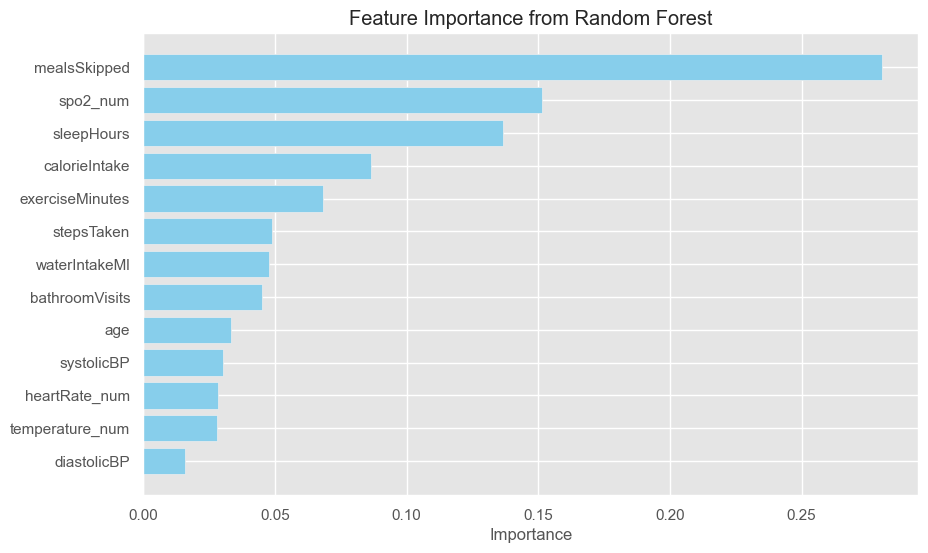

In [87]:
# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': numerical_features,  # Assuming numerical_features is your list of feature names
    'Importance': rf_model.feature_importances_  # Use feature_importances_ instead of coefficients
})

# Sort by importance (descending)
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Print feature importance
print("\nFeature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Assume rf_model and scaler are defined from your training pipeline
# If not, load them, e.g.:
# import joblib
# rf_model = joblib.load('rf_model.pkl')
# scaler = joblib.load('scaler.pkl')

# Feature names from your feature importance
feature_names = [
    'heartRate_num', 'spo2_num', 'temperature_num', 'systolicBP', 'diastolicBP',
    'age', 'stepsTaken', 'calorieIntake', 'sleepHours', 'waterIntakeMl',
    'mealsSkipped', 'exerciseMinutes', 'bathroomVisits'
]

# Function to get user input
def get_user_input():
    print("Enter the following feature values:")
    user_data = {}
    for feature in feature_names:
        while True:
            try:
                value = float(input(f"Enter {feature}: "))
                # Basic range validation based on domain knowledge
                if feature == 'spo2_num' and (value < 0 or value > 100):
                    print(f"{feature} must be between 0 and 100.")
                    continue
                if feature in ['heartRate_num', 'systolicBP', 'diastolicBP', 'age', 'stepsTaken', 'calorieIntake', 'sleepHours', 'waterIntakeMl', 'mealsSkipped', 'exerciseMinutes', 'bathroomVisits'] and value < 0:
                    print(f"{feature} cannot be negative.")
                    continue
                if feature == 'temperature_num' and (value < 30 or value > 45):
                    print(f"{feature} must be between 30 and 45°C.")
                    continue
                user_data[feature] = value
                break
            except ValueError:
                print(f"Invalid input for {feature}. Please enter a numeric value.")
    return user_data

# Get user input
user_data = get_user_input()

# Convert to DataFrame
input_df = pd.DataFrame([user_data], columns=feature_names)

# Scale the input
input_scaled = scaler.transform(input_df)

# Predict and get probabilities
prediction = rf_model.predict(input_scaled)[0]
prob = rf_model.predict_proba(input_scaled)[0]

# Map prediction to class label
class_label = "Stable (0)" if prediction == 0 else "At Risk (1)"

# Output results
print(f"\nPrediction: The person is {class_label}.")
print(f"Probability of Stable (0): {prob[0]:.2f}, At Risk (1): {prob[1]:.2f}")

# If prediction is Stable but you expect At Risk, try adjusted threshold
if prediction == 0:
    print("\nNote: Model predicted 'Stable'. If you expected 'At Risk', trying adjusted threshold (0.4):")
    prediction_adj = 1 if prob[1] > 0.4 else 0
    class_label_adj = "At Risk (1)" if prediction_adj == 1 else "Stable (0)"
    print(f"Adjusted Prediction: The person is {class_label_adj}.")

Enter the following feature values:


Enter heartRate_num:  89
Enter spo2_num:  99
Enter temperature_num:  35
Enter systolicBP:  100
Enter diastolicBP:  66
Enter age:  32
Enter stepsTaken:  11000
Enter calorieIntake:  2000
Enter sleepHours:  8
Enter waterIntakeMl:  2400
Enter mealsSkipped:  2
Enter exerciseMinutes:  60
Enter bathroomVisits:  3



Prediction: The person is Stable (0).
Probability of Stable (0): 0.51, At Risk (1): 0.49

Note: Model predicted 'Stable'. If you expected 'At Risk', trying adjusted threshold (0.4):
Adjusted Prediction: The person is At Risk (1).


### Saving the Model:

In [91]:
# Save the model and scaler
import joblib
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model saved as 'rf_model.pkl' and scaler saved as 'scaler.pkl'.")


Model saved as 'rf_model.pkl' and scaler saved as 'scaler.pkl'.
